# 🧼 Task 5: Decision Trees and Random Forests

**Objective**: Learn tree-based models for classification & regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### 📊 Data Preparation

In [4]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 🌲 Decision Tree Classifier

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



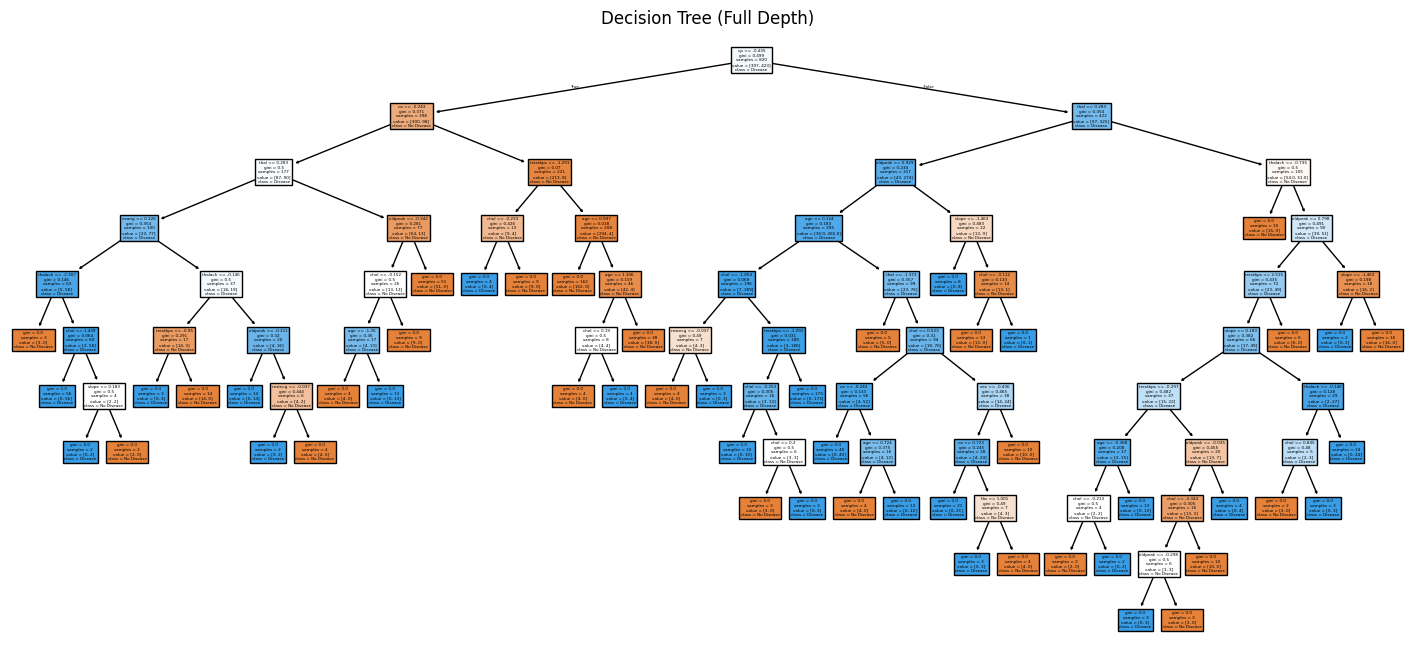

In [6]:
#Visualize Full Tree
plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree (Full Depth)')
plt.show()

#### ✂️ Decision Tree with Depth Limit

In [7]:
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train_scaled, y_train)
y_pred_dt_limited = dt_limited.predict(X_test_scaled)

print("Limited Tree Accuracy (max_depth=3):", accuracy_score(y_test, y_pred_dt_limited))

Limited Tree Accuracy (max_depth=3): 0.7804878048780488


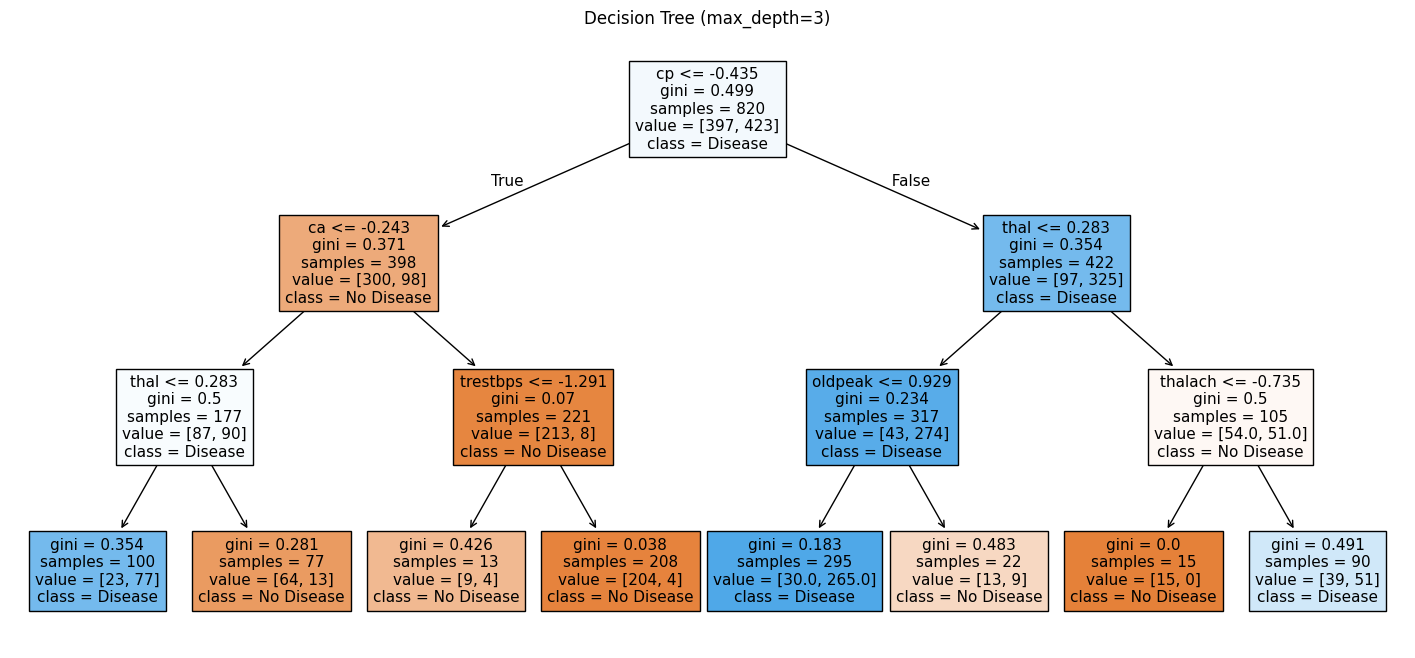

In [8]:
plt.figure(figsize=(18, 8))
plot_tree(dt_limited, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree (max_depth=3)')
plt.show()

#### 🌳 Random Forest Classifier

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



#### 🔍 Feature Importance

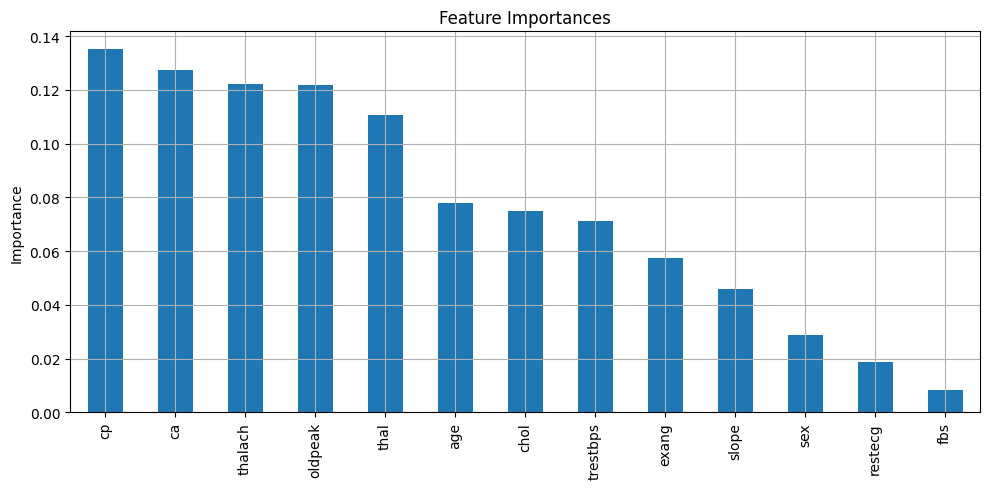

In [10]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importances')
plt.ylabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📏 Cross-Validation Scores

In [11]:
dt_cv_score = cross_val_score(dt, X, y, cv=5).mean()
rf_cv_score = cross_val_score(rf, X, y, cv=5).mean()

print(f"Decision Tree CV Score: {dt_cv_score:.4f}")
print(f"Random Forest CV Score: {rf_cv_score:.4f}")

Decision Tree CV Score: 1.0000
Random Forest CV Score: 0.9971
